In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy import signal

In [43]:
filename = librosa.util.example_audio_file()
y, sr = librosa.load(filename)

In [3]:
ipd.Audio(filename)

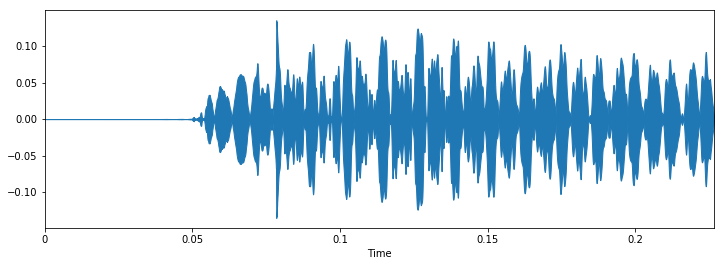

In [36]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y[:5000], sr=sr)

In [39]:
go_sample_path = "./data/train/audio/go/0d53e045_nohash_1.wav"
sample_rate, samples = wavfile.read(go_sample_path)

In [19]:
print(sample_rate)
samples.shape
print(samples[10000:])

16000
[-6077 -4951 -3212 ...   221   234   244]


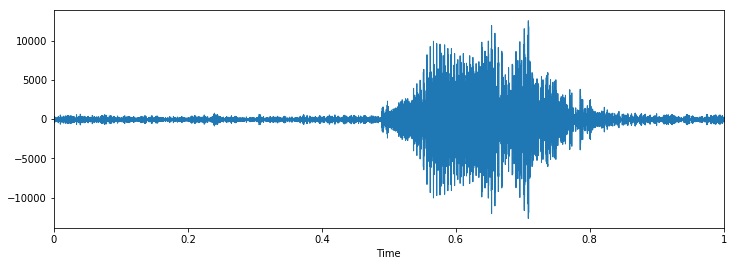

In [21]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples, sr=sample_rate)

(1025, 32)
(1025, 32)


/home/lulin/anaconda2/envs/audio/lib/python2.7/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


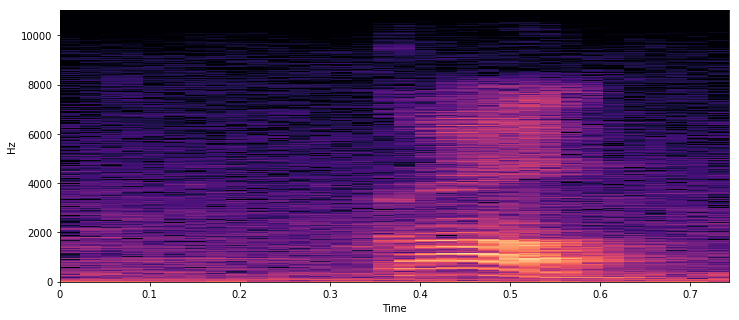

In [19]:
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(X)
print X.shape
print Xdb.shape
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [2]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

(6158, 221)


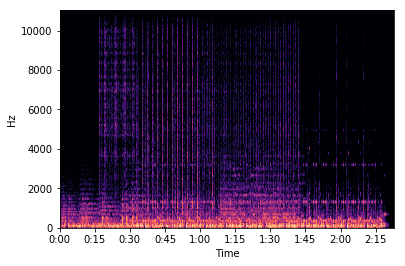

In [25]:
freqs, times, spectrogram = log_specgram(y, sr)
librosa.display.specshow(spectrogram.T, sr=sr, x_axis='time', y_axis='hz')
print(spectrogram.shape)

In [29]:
6158*221

1360918

In [30]:
2647 * 1025

2713175

In [19]:
y.shape
window_size = 20
step_size = 10
sample_rate = sr
nperseg = int(round(window_size * sample_rate / 1e3))
noverlap = int(round(step_size * sample_rate / 1e3))
print(nperseg)
print(noverlap)

441
221


(1025, 2647)
(1025, 2647)


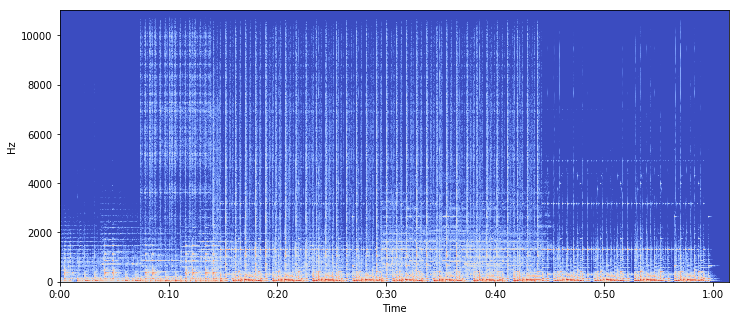

In [26]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
print(Xdb.shape)
print(X.shape)


In [12]:
freqs.shape
print(freqs.shape)
print(times.shape)
print(spectrogram.shape)
# print(freqs)
print(times)

(221,)
(6158,)
(6158, 221)
[1.00000000e-02 1.99773243e-02 2.99546485e-02 ... 6.14204308e+01
 6.14304082e+01 6.14403855e+01]


Text(0.5,0,u'Seconds')

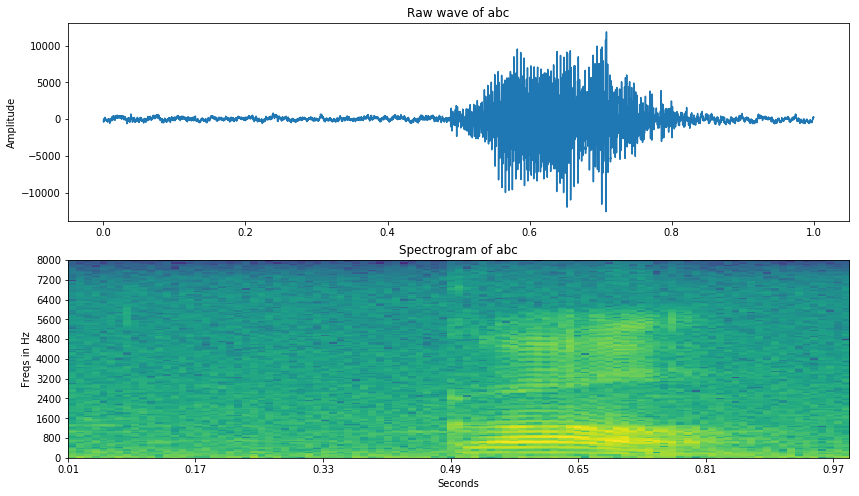

In [23]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)
filename = "abc"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [11]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

In [9]:
sr = 22050 # sample rate
Herz = 8000.0
Herz2 = 0.1080
T = 10.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 1.0*np.sin(2*np.pi*Herz*t)                # pure sine wave at 440 Hz
x2 = 1.0*np.sin(2*np.pi*Herz2*t)

final_x = x#+x2
z = -2.0*np.sin(np.pi*(Herz+Herz2)*t)*np.cos(np.pi*(Herz-Herz2)*t)

In [65]:
1.79*Herz*sr*180 %360

342.0

In [62]:
361.0 %360

1.0

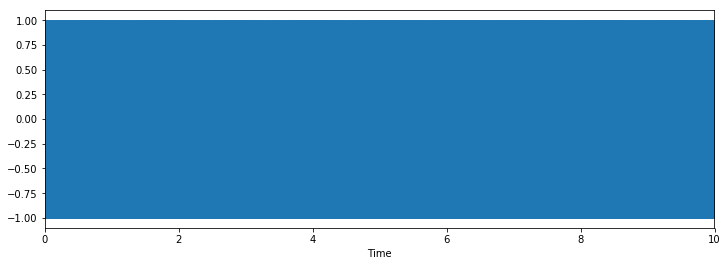

In [7]:
ipd.Audio(final_x, rate=sr) # load a NumPy array
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [10]:
ipd.Audio(final_x, rate=sr)

In [31]:
ipd.Audio(z+final_x, rate=sr)

(1025, 431)
(1025, 431)


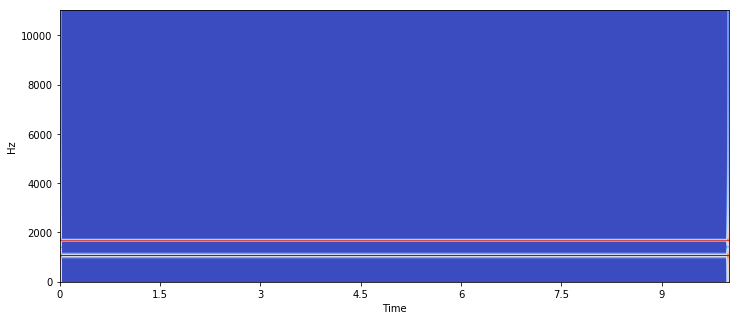

In [13]:
X = librosa.stft(final_x)
Xdb = librosa.amplitude_to_db(X)
print X.shape
print Xdb.shape
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
# librosa.output.write_wav('audio/tone_440.wav', x, sr) # Save file !!![IM]

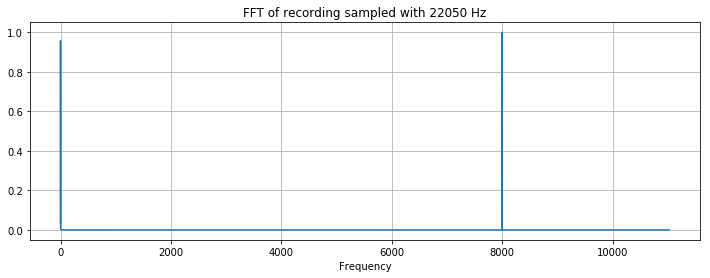

In [16]:
xf, vals = custom_fft(z, sr)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(sr) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

In [47]:
print(len(y)/sr)
# print(sample_rate)
print(sr)

61
22050


Text(0.5,0,u'Seconds')

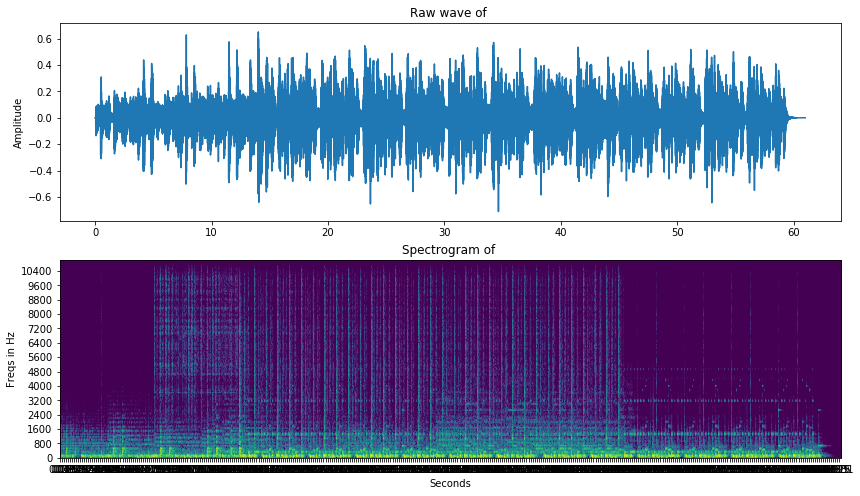

In [50]:
freqs, times, spectrogram = log_specgram(y, sr)
filename = "abc"
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' )
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(y)/sr, len(y)), y)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' )
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')